Install the Matatika client library

In [1]:
%%capture
!pip install matatika==1.3.0

In [2]:
!matatika --version

matatika, version 1.3.0


Import client class from module

In [3]:
from matatika.library import MatatikaClient

Configure a new client

In [4]:
endpoint_url = 'https://catalog.matatika.com/api'

# get from https://app.matatika.com/api-key
auth_token = '<YOUR AUTH TOKEN HERE>'
client = MatatikaClient(auth_token, endpoint_url, workspace_id)

Use `fetch` method to extract data from a dataset as a dictionary...



In [5]:
dataset_id = '<YOUR DATASET ID HERE>'

data = client.fetch(dataset_id)

Convert to a `pandas.DataFrame` object

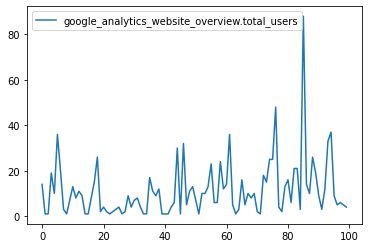

In [6]:
import pandas as pd

df = pd.DataFrame.from_dict(data)
df.plot()

Process date and set as index

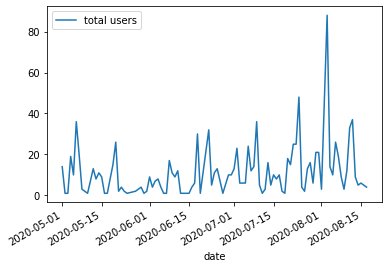

In [7]:
from datetime import datetime

year = 'google_analytics_website_overview.report_year'
month = 'google_analytics_website_overview.report_month'
day = 'google_analytics_website_overview.report_day'
date = 'date'
total_users = 'google_analytics_website_overview.total_users'

processed_df = df

processed_df[date] = processed_df.apply(lambda row: datetime(int(row[year]), int(row[month]), int(row[day])), axis=1)
processed_df = processed_df.set_index(date)
processed_df.drop([year, month, day], axis = 1, inplace=True)

processed_df = processed_df.rename(columns = {total_users: 'total users'})
total_users = 'total users'

processed_df.plot()

Calculate rolling average with a window size of 7

Plot threshold band of +/- 50%

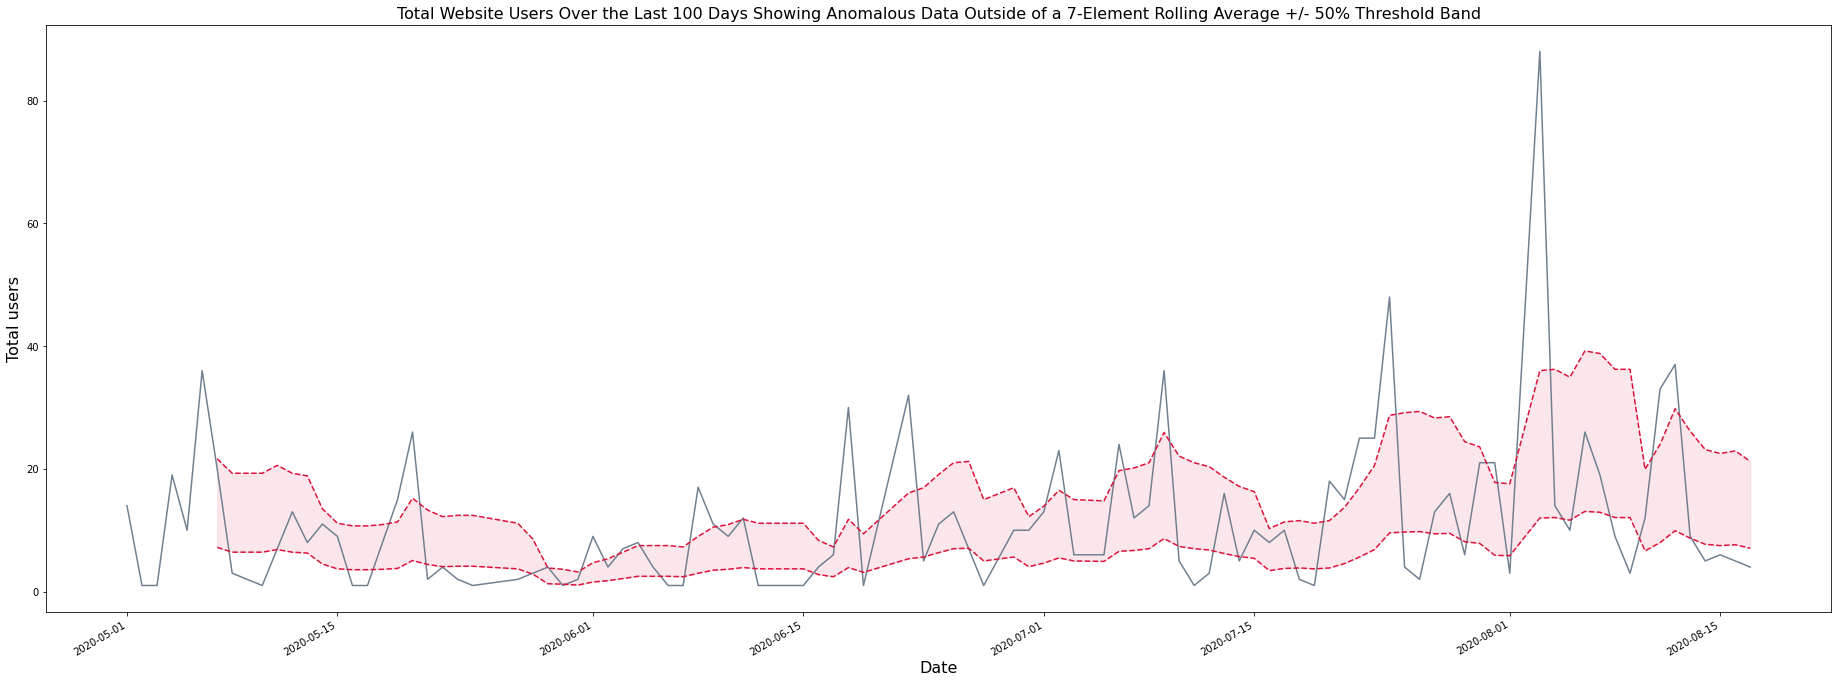

In [8]:
window_size = 7
threshold_percentage = 50

processed_df['rolling average (upper)'] = processed_df[total_users].rolling(window_size).mean() * (1 + (threshold_percentage / 100))
processed_df['rolling average (lower)'] = processed_df[total_users].rolling(window_size).mean() * (1 - (threshold_percentage / 100))

colours = ['slategrey', 'crimson', 'crimson']
styles = ['-', '--', '--']

ax = processed_df.plot(figsize=(32,12), color=colours, style=styles)

ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Total users', fontsize=16)
ax.set_title('Total Website Users Over the Last 100 Days Showing Anomalous Data Outside of a 7-Element Rolling Average +/- 50% Threshold Band', fontsize=16)
ax.legend().remove()
ax.fill_between(processed_df.index, processed_df['rolling average (lower)'], processed_df['rolling average (upper)'], color='crimson', alpha=0.1)